In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

In [24]:
File = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
File

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [26]:
for i in File.columns:
    null_rate = (File[i].isna().sum()/len(File))*100
    if null_rate > 0:
        print("{}'s null rate is {}%".format(i, round(null_rate,2)))

director's null rate is 30.68%
cast's null rate is 9.22%
country's null rate is 6.51%
date_added's null rate is 0.13%
rating's null rate is 0.09%


In [27]:
File['country'].value_counts().to_frame()

,country
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Netherlands, Belgium, Germany, Jordan",1
"Mexico, United States, Spain, Colombia",1
"Brazil, India, China, United States",1
"Switzerland, United Kingdom, United States",1


In [28]:
File['country'] = File['country'].fillna(File['country'].mode()[0])
File['country'].isna().sum()

0

In [29]:
File['date_added'].value_counts().to_frame()

,date_added
"January 1, 2020",118
"November 1, 2019",94
"December 31, 2019",76
"March 1, 2018",76
"October 1, 2018",72
...,...
"August 23, 2017",1
"May 14, 2017",1
"March 14, 2020",1
"November 14, 2012",1


In [30]:
File['date_added']= File['date_added'].fillna(F['date_added'].mode()[0])
File['date_added'].isna().sum()

0

In [31]:
File['rating'].value_counts().to_frame()

,rating
TV-MA,2863
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194
NR,84


In [33]:
File['rating'] = F['rating'].fillna(File['rating'].mode()[0])
File['rating'].isna().sum()

5377

In [34]:
File = File.drop(['director', 'cast'], axis=1)
File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   country       7787 non-null   object
 4   date_added    7787 non-null   object
 5   release_year  7787 non-null   int64 
 6   rating        2410 non-null   object
 7   duration      7787 non-null   object
 8   listed_in     7787 non-null   object
 9   description   7787 non-null   object
dtypes: int64(1), object(9)
memory usage: 608.5+ KB


In [35]:
File['date_added'] = pd.to_datetime(File['date_added'])
File['year_added'] = File['date_added'].dt.year
File['month_added'] = File['date_added'].dt.month

File['year_added'].astype('int')
File['month_added'].astype('int')

F.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
5,s6,TV Show,46,Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7
11,s12,TV Show,1983,"Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11
12,s13,TV Show,1994,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5
16,s17,TV Show,Feb-09,United States,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3


As comparing these both, Movies has most count than Tv shows

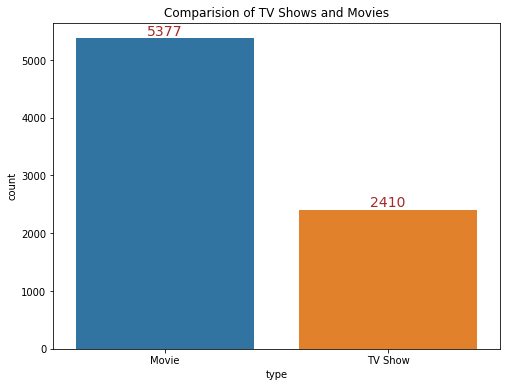

In [84]:
plt.figure(figsize= (8,6))

ax = sns.countplot(x= 'type', data = File, order = File['type'].value_counts().index)
plt.title("Comparision of TV Shows and Movies")    
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='brown', ha='center', va='bottom')
plt.show()

As of this US produced many movies 

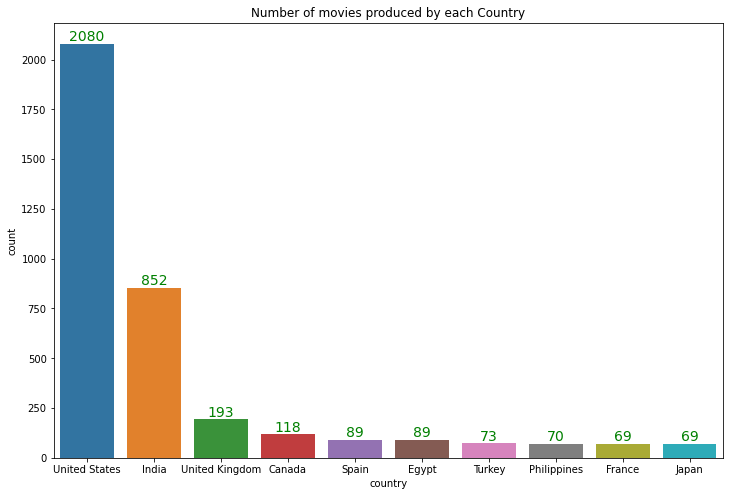

In [52]:

movies = File[File['type']== 'Movie']
plt.figure(figsize=(12,8))
ax2 = sns.countplot(x='country',data=movies, order = movies['country'].value_counts().head(10).index)
plt.title("Number of movies produced by each Country")

for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='green', ha='center', va='bottom')
plt.show()

US produced many TV shows

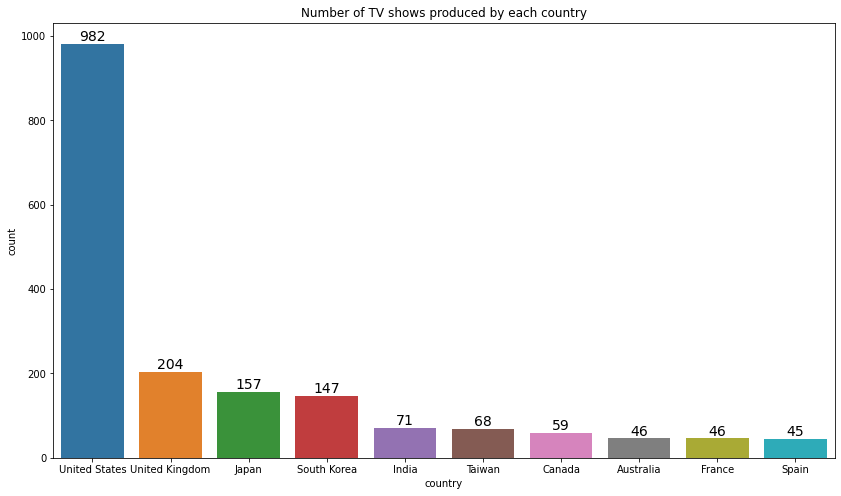

In [81]:

TV = File[File['type']== 'TV Show']

plt.figure(figsize=(14,8))
ax3 = sns.countplot(x='country',data=TV, order = TV['country'].value_counts().head(10).index)
plt.title("Number of TV shows produced by each country")

for p in ax3.patches:
    ax3.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='black', ha='center', va='bottom')
plt.show()

Documentary is the best rated genre

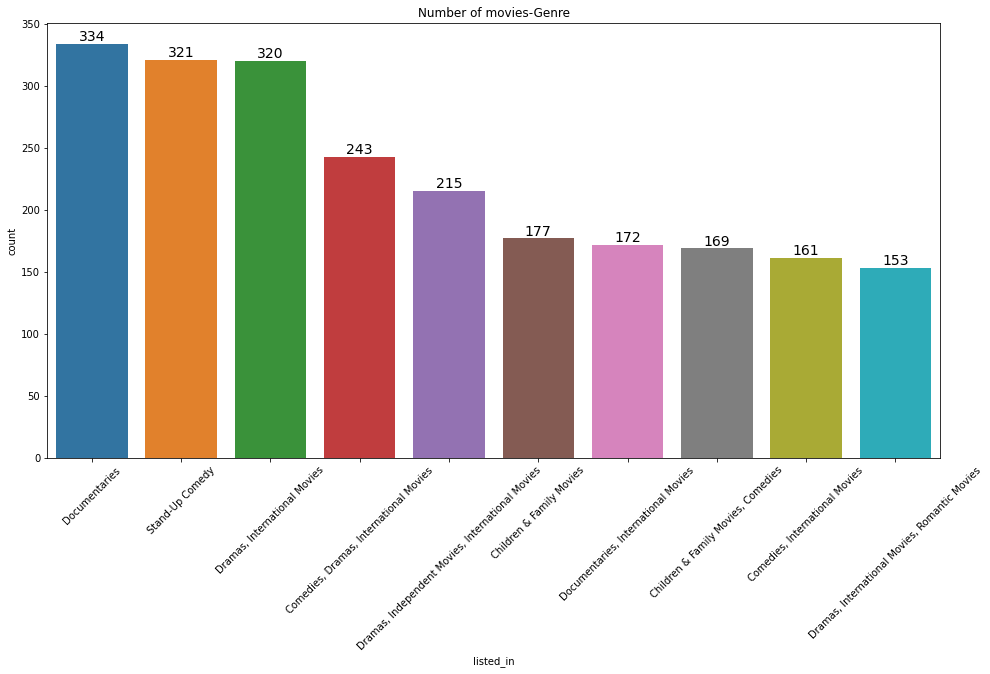

In [79]:

plt.figure(figsize=(16,8))
ax5 = sns.countplot(x='listed_in', data=movies, order = movies['listed_in'].value_counts().head(10).index)
plt.title("Number of movies-Genre")
plt.xticks(rotation=45)
for p in ax5.patches:
    ax5.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='Black', ha='center', va='bottom')    
plt.show()

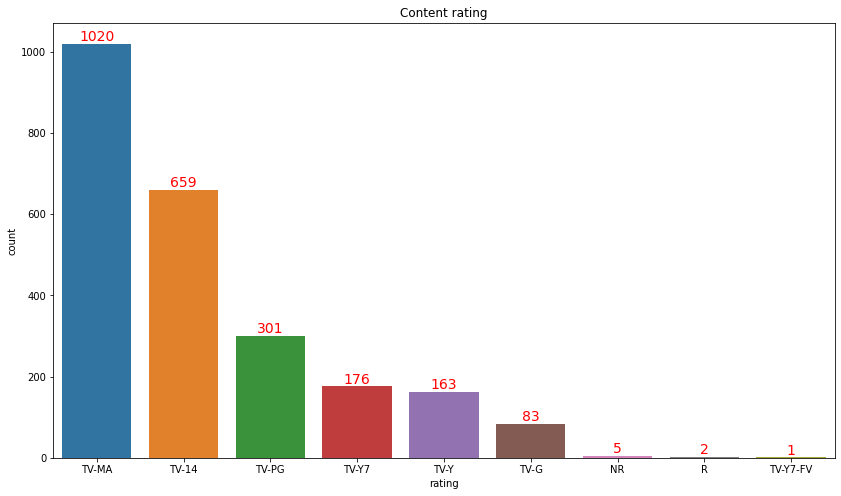

In [86]:

plt.figure(figsize=(14,8))
ax4 = sns.countplot(x='rating',data=File, order = File['rating'].value_counts().index)
plt.title("Content rating")

for p in ax4.patches:
    ax4.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='Red', ha='center', va='bottom')
plt.show()